In [21]:
import pyhdf
import pyhdf.SD 
import numpy
import earthpy
import earthpy.plot
import matplotlib.pyplot as plt
import copy
import glob
import xarray

# Reading Data

In [29]:
day = '058'
tile_name = glob.glob('MOD09GA/MYD09GA.A2020{day}*'.format(day=day))[0]
mod09ga = pyhdf.SD.SD(tile_name)
#list(mod09ga.datasets())
tile_name

'MOD09GA/MYD09GA.A2020058.h08v05.006.2020060030304.hdf'

In [23]:
# Determining the fill value for masks
fill_value = mod09ga.select('sur_refl_b01_1').getfillvalue()

In [24]:
# Reading first layer 2D data
sur_refl_b01_1 = mod09ga.select('sur_refl_b01_1').get()
sur_refl_b02_1 = mod09ga.select('sur_refl_b02_1').get()
sur_refl_b03_1 = mod09ga.select('sur_refl_b03_1').get()
sur_refl_b04_1 = mod09ga.select('sur_refl_b04_1').get()
sur_refl_b05_1 = mod09ga.select('sur_refl_b05_1').get()
sur_refl_b06_1 = mod09ga.select('sur_refl_b06_1').get()
sur_refl_b07_1 = mod09ga.select('sur_refl_b07_1').get()
sur_refl_b01_1.shape

(2400, 2400)

In [25]:
# Reading additional observations
sur_refl_b01_c = mod09ga.select('sur_refl_b01_c').get()
sur_refl_b02_c = mod09ga.select('sur_refl_b02_c').get()
sur_refl_b03_c = mod09ga.select('sur_refl_b03_c').get()
sur_refl_b04_c = mod09ga.select('sur_refl_b04_c').get()
sur_refl_b05_c = mod09ga.select('sur_refl_b05_c').get()
sur_refl_b06_c = mod09ga.select('sur_refl_b06_c').get()
sur_refl_b07_c = mod09ga.select('sur_refl_b07_c').get()
sur_refl_b07_c.shape

(741654,)

In [26]:
# Creating a stack of all layer one bands
layer1 = numpy.stack([sur_refl_b01_1, sur_refl_b02_1, 
                      sur_refl_b03_1, sur_refl_b04_1, 
                      sur_refl_b05_1, sur_refl_b06_1,
                      sur_refl_b07_1])
layer1 = numpy.ma.masked_where(layer1==fill_value, layer1)

In [27]:
# n_obs are the TOTAL number of observations per cell
n_obs_500 = mod09ga.select('num_observations_500m').get()
n_obs_1km = mod09ga.select('num_observations_1km').get()
n_obs_500.shape

(2400, 2400)

In [28]:
# The maximum total observations of a 500 m cell
n_obs_500.max()

2

# Plausibility exploration

In [30]:
# How many cells have more than one observation
n_cells_aditional_obs = (n_obs_500>1).sum()
print(n_cells_aditional_obs)

# How many additional observations are there (for band 1)
n_add_obs = sur_refl_b01_c.size
print(n_add_obs)

741654
741654


# Plots
[earthpy plot_rgb() docs](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_rgb.html#stretch-composite-images)

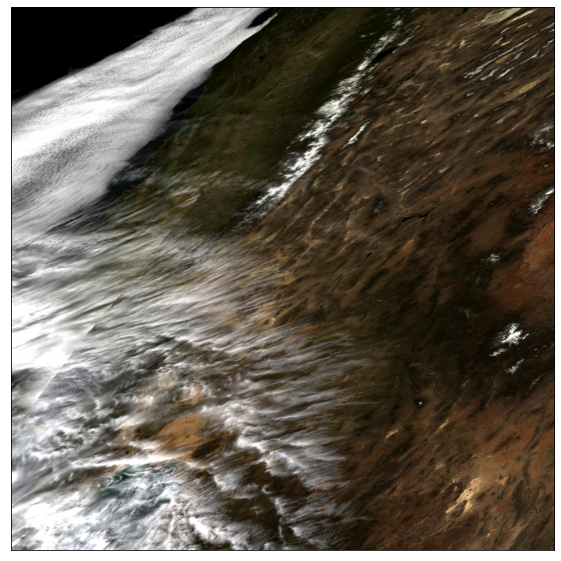

In [31]:
# Stretch culls the top and bottom 2 % of the value range
earthpy.plot.plot_rgb(layer1, rgb=[0, 3, 2], stretch=True)

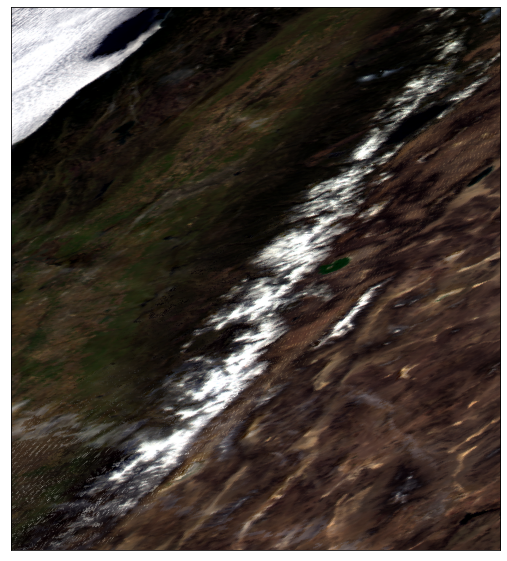

In [32]:
earthpy.plot.plot_rgb(layer1[:, 0:1000, 900:1800], rgb=[0, 3, 2], stretch=True)
#earthpy.plot.plot_rgb(layer1[:,900:1700, 0:900], rgb=[0, 3, 2], stretch=True)

## Number of observations

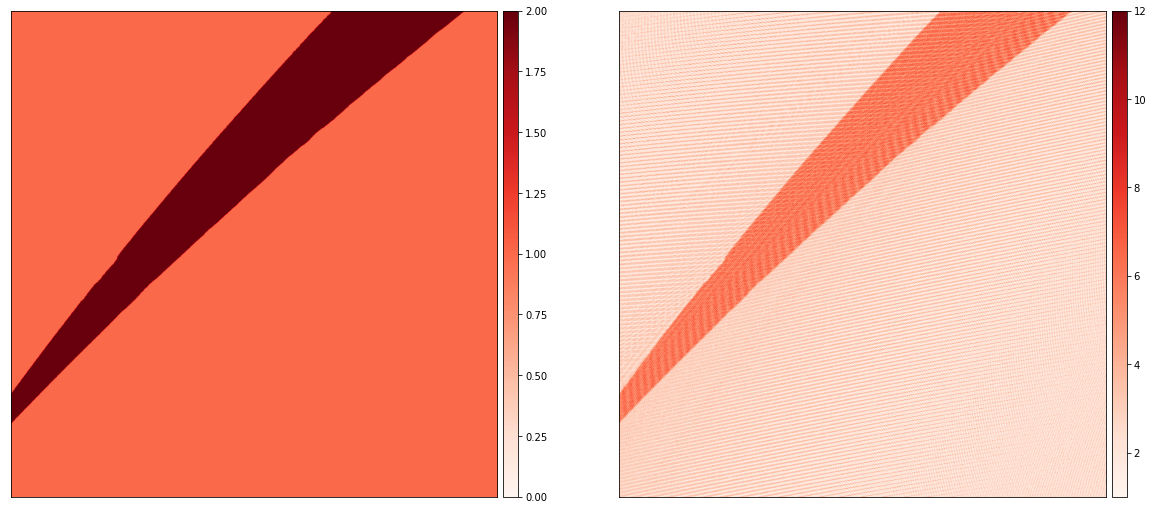

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

earthpy.plot.plot_bands(n_obs_500, cmap='Reds', cbar=True, ax=ax[0])
earthpy.plot.plot_bands(n_obs_1km, cmap='Reds', cbar=True, ax=ax[1])

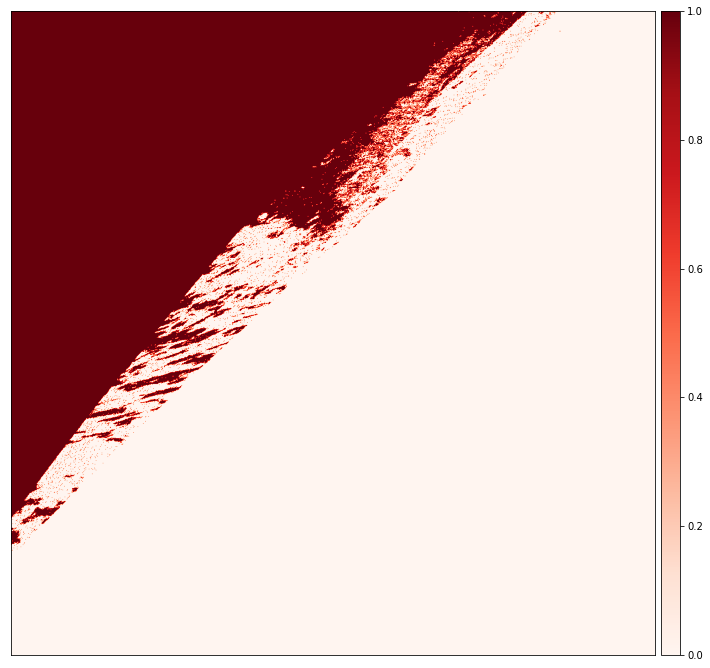

In [13]:
orbit_pnt_1 = mod09ga.select('orbit_pnt_1').get()
earthpy.plot.plot_bands(orbit_pnt_1, cmap='Reds', cbar=True)

# Layer with second observations

In [14]:
sur_refl_b01_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b01_1), mask=True)
sur_refl_b02_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b02_1), mask=True)
sur_refl_b03_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b03_1), mask=True)
sur_refl_b04_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b04_1), mask=True)
sur_refl_b05_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b05_1), mask=True)
sur_refl_b06_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b06_1), mask=True)
sur_refl_b07_2 = numpy.ma.array(numpy.zeros_like(sur_refl_b07_1), mask=True)

serial_pointer = 0
for x in range(n_obs_500.shape[0]):
    for y in range(n_obs_500.shape[1]):
        n = n_obs_500[x, y]
        if n == 2:
            sur_refl_b01_2[x,y] = sur_refl_b01_c[serial_pointer]
            sur_refl_b02_2[x,y] = sur_refl_b02_c[serial_pointer]
            sur_refl_b03_2[x,y] = sur_refl_b03_c[serial_pointer]
            sur_refl_b04_2[x,y] = sur_refl_b04_c[serial_pointer]
            sur_refl_b05_2[x,y] = sur_refl_b05_c[serial_pointer]
            sur_refl_b06_2[x,y] = sur_refl_b06_c[serial_pointer]
            sur_refl_b07_2[x,y] = sur_refl_b07_c[serial_pointer]
            serial_pointer += 1

In [15]:
layer2 = numpy.ma.stack([sur_refl_b01_2, sur_refl_b02_2, sur_refl_b03_2, 
                      sur_refl_b04_2, sur_refl_b05_2, sur_refl_b06_2,sur_refl_b07_2])

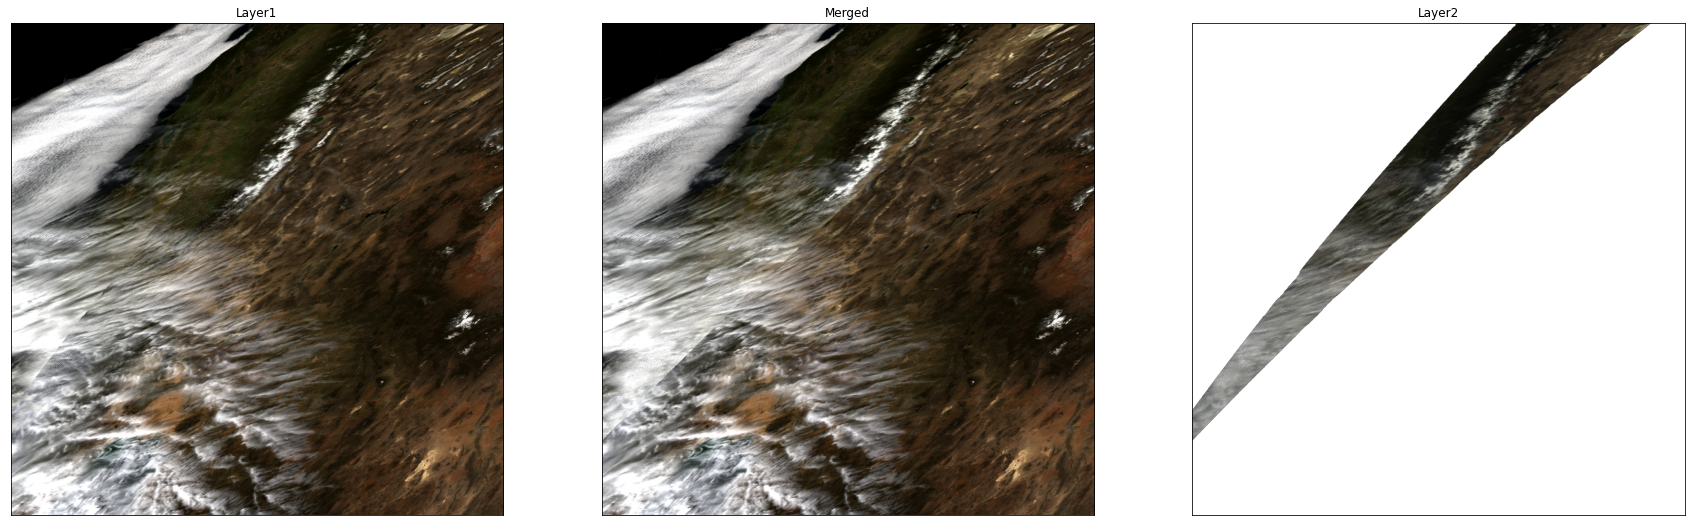

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

merged = copy.copy(layer2)
merged[layer2.mask] = layer1[layer2.mask]

earthpy.plot.plot_rgb(layer1, rgb=[0, 3, 2], title='Layer1', stretch=True, ax=ax[0])
earthpy.plot.plot_rgb(merged, rgb=[0, 3, 2], title='Merged', stretch=True, ax=ax[1])
earthpy.plot.plot_rgb(layer2, rgb=[0, 3, 2], title='Layer2', stretch=False, ax=ax[2])

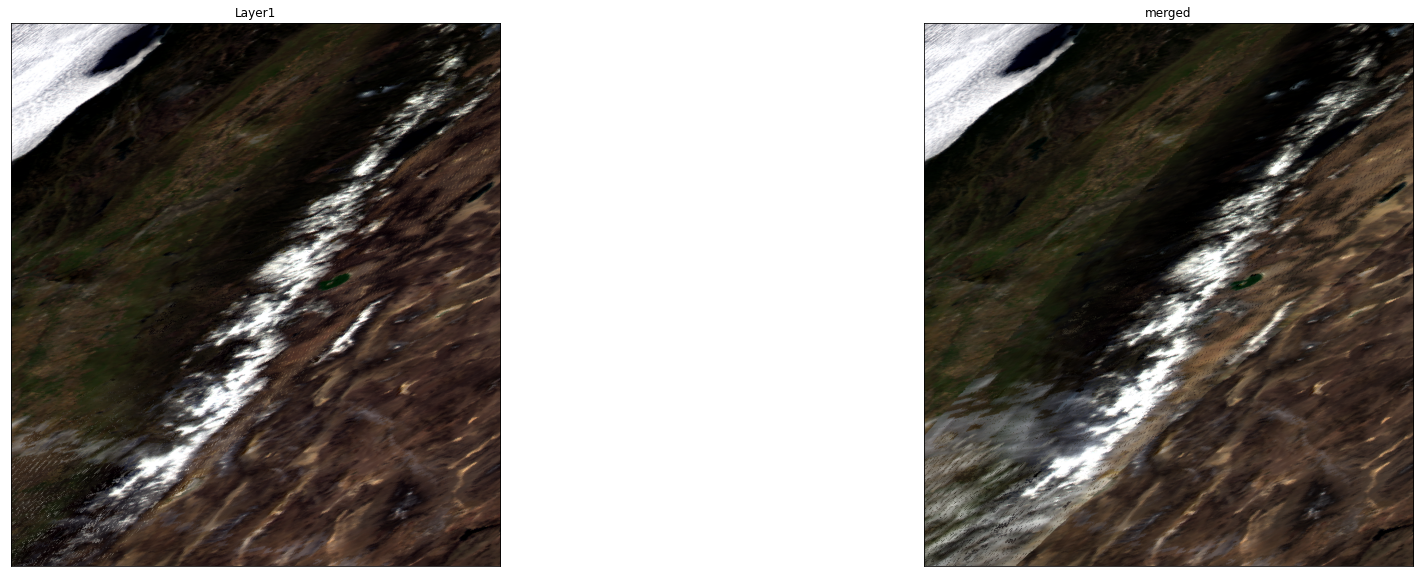

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

earthpy.plot.plot_rgb(layer1[:, 0:1000, 900:1800], rgb=[0, 3, 2], title='Layer1', stretch=True, ax=ax[0])
earthpy.plot.plot_rgb(merged[:, 0:1000, 900:1800], rgb=[0, 3, 2], title='merged', stretch=True, ax=ax[1])

# Build up Multi-Granule Stack/Array

In [36]:
tiles = glob.glob('MOD09GA/MOD09GA*')
tiles_cube = []

for tile in tiles:    
    l1 = numpy.ma.array(numpy.empty_like(layer1), mask=True)
    l2 = numpy.ma.array(numpy.empty_like(layer1), mask=True)
    observation_cube = numpy.ma.stack([l1, l2])
    tiles_cube.append(observation_cube)

# Stacking the cubes
# - 5 tiles
# - Each two observation  layers
# - Each 7 Bands
# - x,y 2400 
tiles_cube = numpy.ma.stack(tiles_cube)
tiles_cube.shape

(5, 2, 7, 2400, 2400)

In [37]:
array_size = (tiles_cube.size * tiles_cube.itemsize)/1000/1000/1000
print("{} GB".format(array_size))

0.8064 GB


# Weird flex, but OK: Xarray

In [20]:
coords = [tiles, [1,2], [1,2,3,4,5,6,7], range(0,2400), range(0,2400)]
dims = ['tiles', 'layers', 'bands', 'x', 'y']

xarray.DataArray(tiles_cube, coords=coords, dims=dims)

<xarray.DataArray (tiles: 5, layers: 2, bands: 7, x: 2400, y: 2400)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         ...,

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],


        [[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         ...,

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]],



       [[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

        